## Rental in London
In this notebook we will explore data about rental in London
We are going to answer these questions
- distribution of prices per area
- sales share per month (season)
- average house price per year
- sales per year
- heat map for most affecting variables
- average price for each area

This is the dataset we are using https://www.kaggle.com/datasets/psgpyc/london-property-rental/data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("rent_london.csv")
df.head()
df.describe()


Matplotlib is building the font cache; this may take a moment.


,rent,deposit,BEDROOMS,BATHROOMS,avg_distance_to_nearest_station,nearest_station_count
count,3478.000000,3478.000000,2841.000000,3049.000000,3478.000000,3478.000000
mean,2593.092582,1789.097757,1.797958,1.431617,0.494940,2.997412
std,2641.117440,2657.305000,0.916597,0.895819,0.361535,0.050811
min,50.000000,0.000000,1.000000,1.000000,0.100000,2.000000
25%,1550.000000,0.000000,1.000000,1.000000,0.300000,3.000000
50%,2275.000000,1038.000000,2.000000,1.000000,0.400000,3.000000
75%,3250.000000,2825.000000,2.000000,2.000000,0.600000,3.000000
max,78000.000000,60000.000000,7.000000,20.000000,10.800000,3.000000


### Exploring rent column
- What is min and max values
- Histogram
- Exculde outliers

In [ ]:
sns.histplot(data=df, x="rent")


In [3]:
x = df[df["rent"] < 500]
x.describe()

,rent,deposit,BEDROOMS,BATHROOMS,avg_distance_to_nearest_station,nearest_station_count
count,124.000000,124.000000,3.0,6.0,124.000000,124.0
mean,216.830645,110.862903,1.0,1.0,0.465323,3.0
std,112.060431,151.947966,0.0,0.0,0.329336,0.0
min,50.000000,0.000000,1.0,1.0,0.200000,3.0
25%,150.000000,0.000000,1.0,1.0,0.300000,3.0
50%,195.000000,0.000000,1.0,1.0,0.400000,3.0
75%,252.500000,200.500000,1.0,1.0,0.500000,3.0
max,499.000000,700.000000,1.0,1.0,3.400000,3.0


In [ ]:
x = df[df["rent"] > 10000]
x.describe()

### Exploring Average Rent
- Average rent per Area
- Average rent per bedroom
- Average rent per bedroom per area

In [9]:
df.groupby('subdistrict_code')['rent'].mean()

subdistrict_code
AL1     1049.500000
AL10    1600.000000
AL9     2350.000000
BR1     1512.500000
BR2     1850.000000
           ...     
WD18    1161.666667
WD19    2175.000000
WD25    3993.750000
WD3     2500.000000
WD6     1287.500000
Name: rent, Length: 211, dtype: float64

In [ ]:
df.describe(include=[object])  


In [19]:
df['area'] = df['subdistrict_code'].str[0:2]
df.describe(include=[object])  


,address,subdistrict_code,Let type,Furnish Type,Coucil Tax,PROPERTY TYPE,SIZE,area
count,3478,1868,3235,3477,3477,3438,3478,1868
unique,2879,211,2,5,3,27,543,34
top,"Lexham Gardens, London, W8",E14,Long term,Furnished,Ask agent,Flat,Ask agent,SW
freq,18,202,3133,1991,3446,1260,2556,541


In [20]:
df.groupby('area')['rent'].mean()

area
AL    1512.250000
BR    1672.916667
Bo    1746.000000
CR     709.375000
DA    2062.416667
E1    2412.190031
E2    3039.545455
E6    1500.000000
EC    2486.862069
EN    1904.000000
HA    1503.526316
HP    1700.000000
IG    1765.777778
Iv    2800.000000
KT    1415.461538
Ke    2600.000000
N1    1475.447368
N2    1421.500000
N4    3380.000000
N7    1800.000000
NW    3106.735537
RM    2078.125000
SE    1806.990291
SL    2307.500000
SM     751.250000
SW    3078.589649
TW    1648.804348
UB    1402.500000
W1    3469.173611
W2    9390.000000
W8    4139.391304
W9    2000.000000
WC    4080.894737
WD    2327.142857
Name: rent, dtype: float64

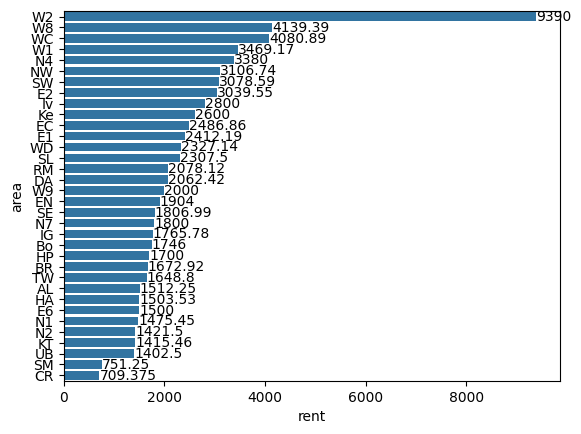

In [42]:
ax = sns.barplot(
    y="area", x="rent",
    data=df.groupby('area')['rent'].mean().sort_values(ascending=False).to_frame(),
)
ax.bar_label(ax.containers[0], fontsize=10);


In [ ]:
df.groupby('BEDROOMS')['rent'].mean()

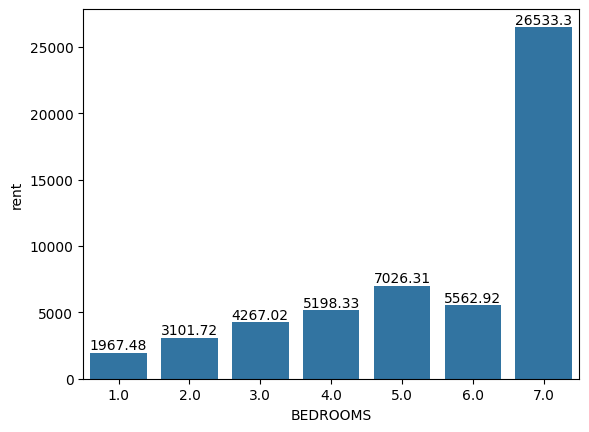

In [30]:
a = sns.barplot(
    x="BEDROOMS", y="rent",
    data=df.groupby('BEDROOMS')['rent'].mean().sort_values(ascending=False).to_frame(),
)
a.bar_label(a.containers[0], fontsize=10);

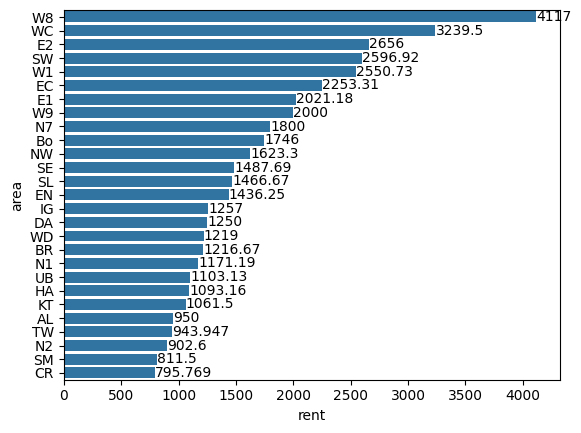

In [41]:
mask = df['BEDROOMS'] == 1.0

a = sns.barplot(
    y="area", x="rent",
    data=df[mask].groupby('area')['rent'].mean().sort_values(ascending=False).to_frame(),
)
a.bar_label(a.containers[0], fontsize=10);

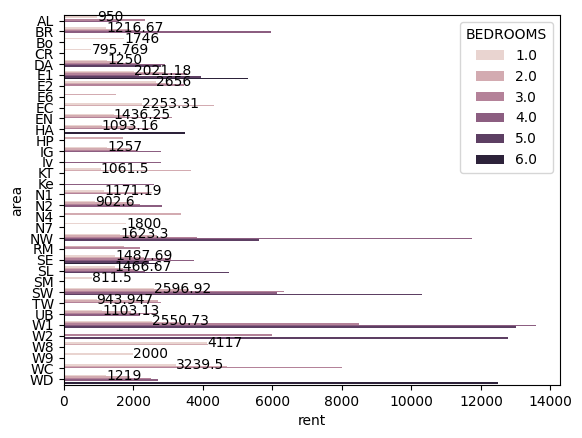

In [36]:
fig, axx = plt.subplots(figsize=(8, 15))

b = sns.barplot(
    y='area', x='rent', hue='BEDROOMS',
    data=df.groupby(['area','BEDROOMS'])['rent'].mean().to_frame(),
)


In [ ]:
df.groupby(['area','BEDROOMS'])['rent'].mean()